In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

tf.keras.backend.clear_session()
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
# Radial basis activation function (bump): e^(1-1/x^2) for -1 < x < 1
@tf.function
def rbf(x):
    return tf.where(tf.abs(x) <= 1, tf.exp(1 - 1 / (1-tf.pow(x, 2))), 0)

In [3]:
model = keras.models.Sequential([
    keras.layers.Dense(1,
                       use_bias=False,
                       input_shape=(2,),
                       activation=rbf)
])
initial_weights = [1, 1]
model.weights[0].assign(tf.constant(np.array(initial_weights).reshape((2, 1)).astype(np.float32)))

<tf.Variable 'UnreadVariable' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [0]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["binary_accuracy"])
#model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [5]:
model.get_weights()

[array([[1.],
        [1.]], dtype=float32)]

In [6]:
y = np.array([
    1,
    1,
    0,
    0
])
x = np.array([
    (0, 0),
    (2, 2),
    (2, 0),
    (0, 2)
])
x, y

(array([[0, 0],
        [2, 2],
        [2, 0],
        [0, 2]]), array([1, 1, 0, 0]))

In [7]:
history = model.fit(x, y,
                    batch_size=len(y),
                    epochs=20000)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 1ms/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17502/20000
4/4 [==============================] - 0s 743us/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17503/20000
4/4 [==============================] - 0s 723us/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17504/20000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17505/20000
4/4 [==============================] - 0s 798us/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17506/20000
4/4 [==============================] - 0s 902us/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17507/20000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17508/20000
4/4 [==============================] - 0s 764us/sample - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 17509/20000
4/4 [==============================] - 0s 1

Text(0, 0.5, 'Loss')

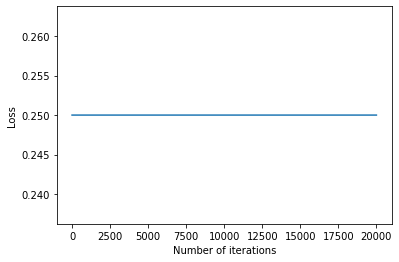

In [8]:
fig, ax = plt.subplots()
ax.plot(history.history["loss"])
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Loss")

In [9]:
model.get_weights()

[array([[1.],
        [1.]], dtype=float32)]

In [10]:
model.predict([[2., 2]])

array([[0.]], dtype=float32)

In [11]:
loss, accuracy = model.evaluate(x, y)
print(f"Accuracy: {accuracy*100:.0f}%, loss: {loss:.2f}")

4/4 [==============================] - 0s 12ms/sample - loss: 0.2500 - binary_accuracy: 0.7500
Accuracy: 75%, loss: 0.25


In [12]:
data = history.history["loss"]
NUM_POINTS = 100
with open("../data/week6_stripe_loss.dat", "w") as f:
    for i, x in enumerate(data, 1):
        if i % (len(data) // NUM_POINTS) == 1:
            f.write(f"{i}\t{x}\n")

FileNotFoundError: ignored